# CART

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("hitters.csv")
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
y = df["Salary"]
X = df.drop(["League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

* Burada ağaca dayalı yöntemleri ilk kez kullanacağımız için iki tane değişken alarak devam edeceğiz.
* **Hits** değişkeni atış sayısını ifade etmektedir.

In [5]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])
model = DecisionTreeRegressor().fit(X_train, y_train)

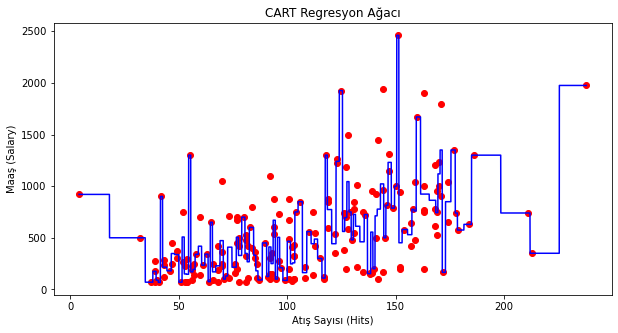

In [6]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (10,5))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_grid, model.predict(X_grid), color = "blue")
plt.title("CART Regresyon Ağacı")
plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş (Salary)")
plt.show()

* Dallanma sayısını sınırlayabiliriz.

In [7]:
model = DecisionTreeRegressor(max_leaf_nodes = 3).fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0663148428844

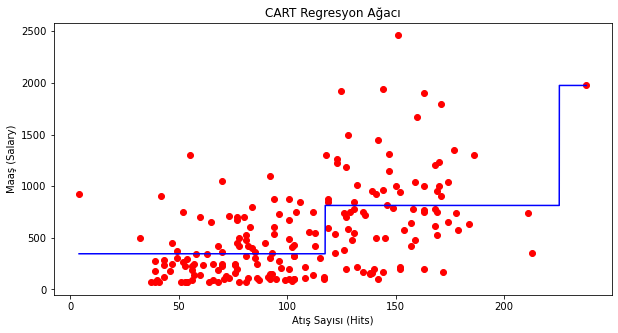

In [8]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (10,5))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_grid, model.predict(X_grid), color = "blue")
plt.title("CART Regresyon Ağacı")
plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş (Salary)");

## Tüm Değişkenlerle Model

In [9]:
y = df["Salary"]
X = df.drop(["League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
model = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

87.08984285225402

## Model Tuning

In [11]:
params = {
    "max_depth": [2,3,4,5,10,20],
    "min_samples_split": [2,10,5,30,50,10],
}
cart = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart, params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)
cart_cv_model.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 311 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.9s finished


{'max_depth': 20, 'min_samples_split': 2}

In [12]:
model_tuned = DecisionTreeRegressor(max_depth = 20, min_samples_split = 10).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

84.97275613390917

In [13]:
r2_score(y_test, y_pred)

0.9666458431086205